# 순환 신경망 RNN
# Recurrent Neural Networks

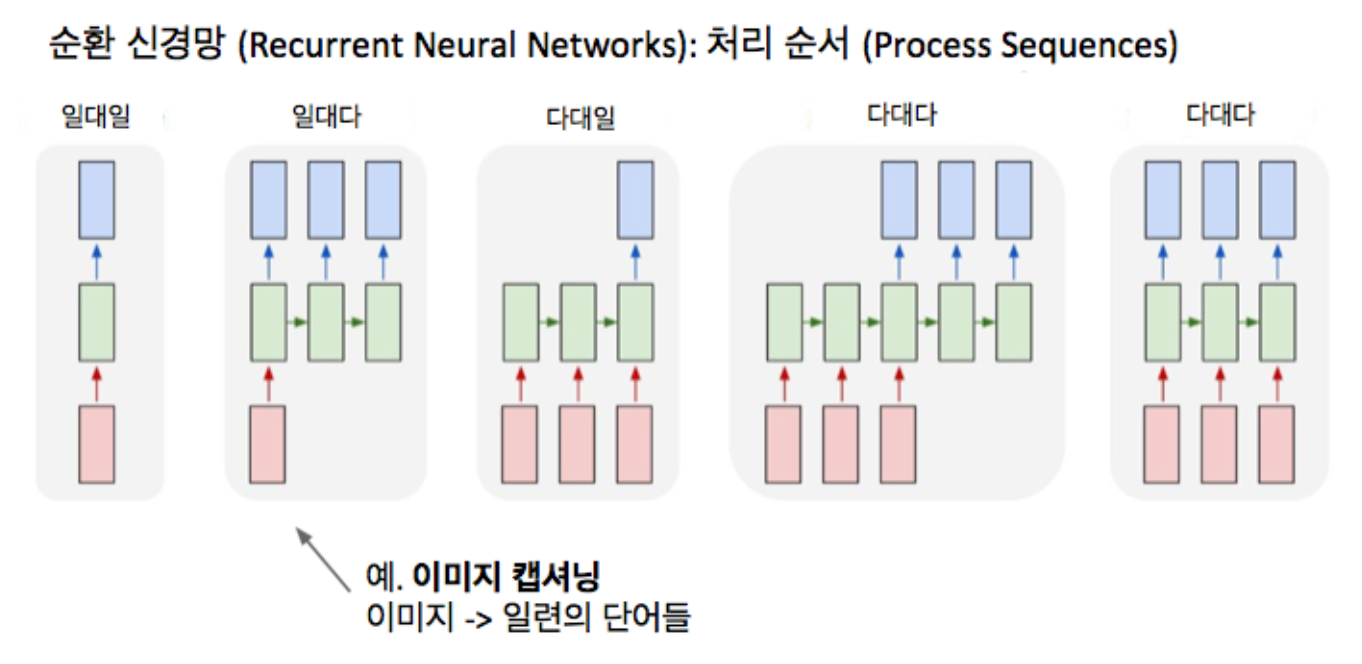

일대 다에서 입력은 이미지이지만 출력은 캡션 같은 일련의 변수 길이가 될 수 있음.  -> 출력의 길이 변화 필요  
다대다는 기계 번역이란 예가 있는데 입력과 출력 둘다의 다양한 길이의 순열을 받아들일 수 있는 모델이 필요함.


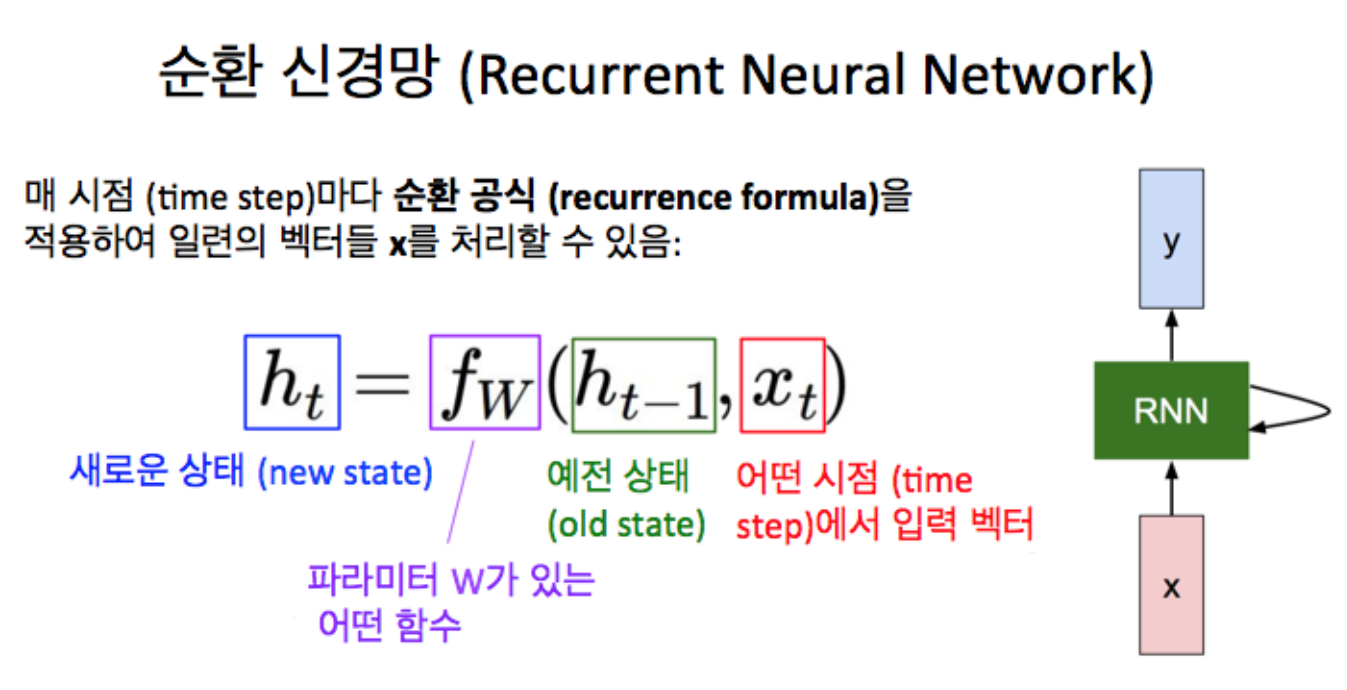

숨겨진 상태 $h_{t-1}$을 받아들이고 현재 상태에서 입력 $x_1$을 받고 숨겨진 상태를 출력!  


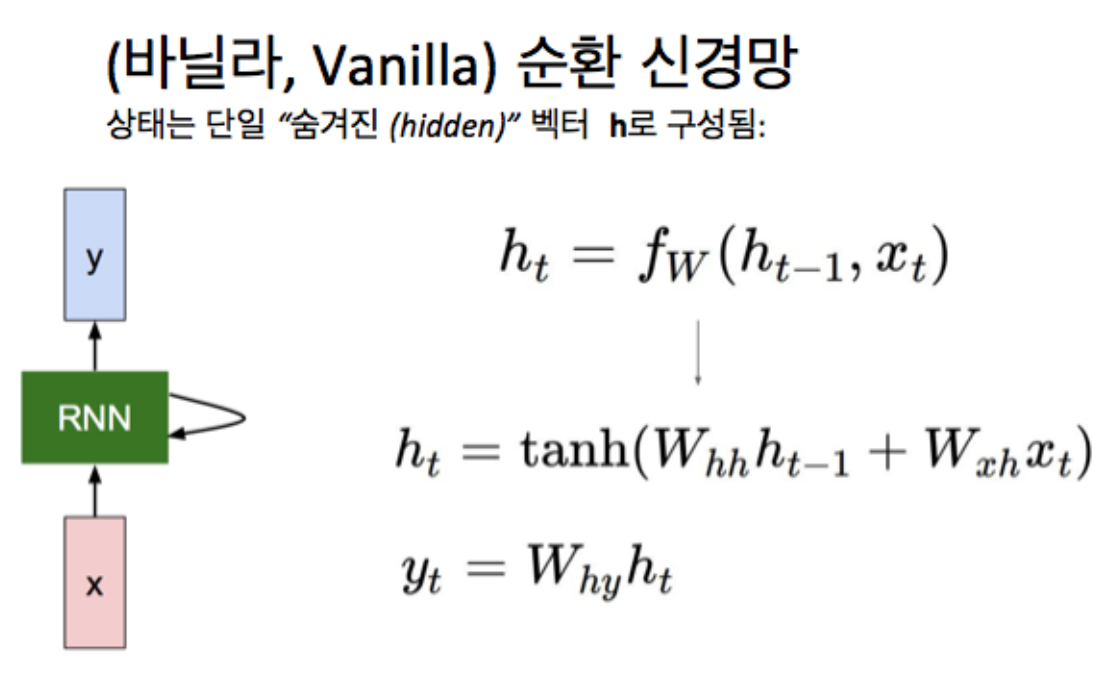

가중치를 곱하고 tanh로 한쪽으로 몰면, 시스템에서 어떤 종류의 비선형을 얻게 됨.  


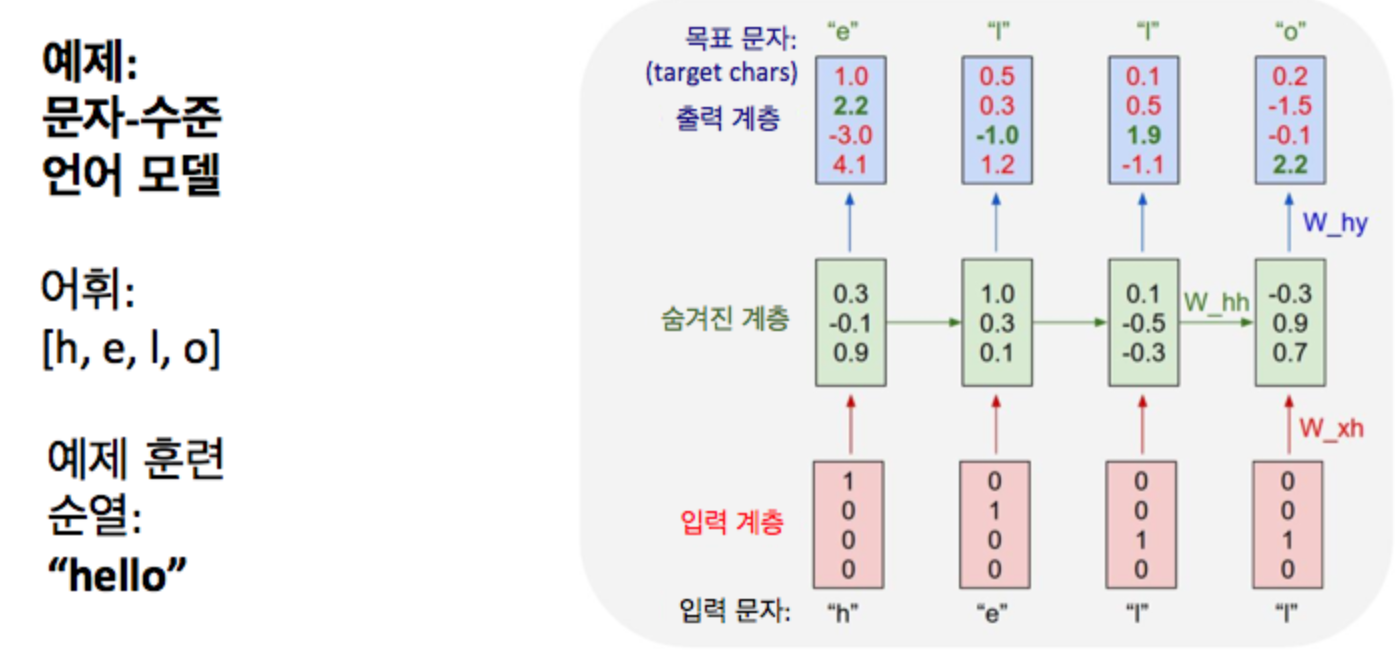

어휘가 h e l o라서 입력을 할 때 입력되는 문자를 가르키는 부분만 1로 나머진 0으로 해주는 원핫 인코딩 벡터를 집어넣음  
그러면 똑같은 순서로 예측 점수를 줌.  
이를 소프트맥스 손실을 사용해서 정량화함  
이것과 새로운 입력을 합쳐서 새로운 히든 셀을 만들고 이것을 반복하면 Recurrent해지는 것

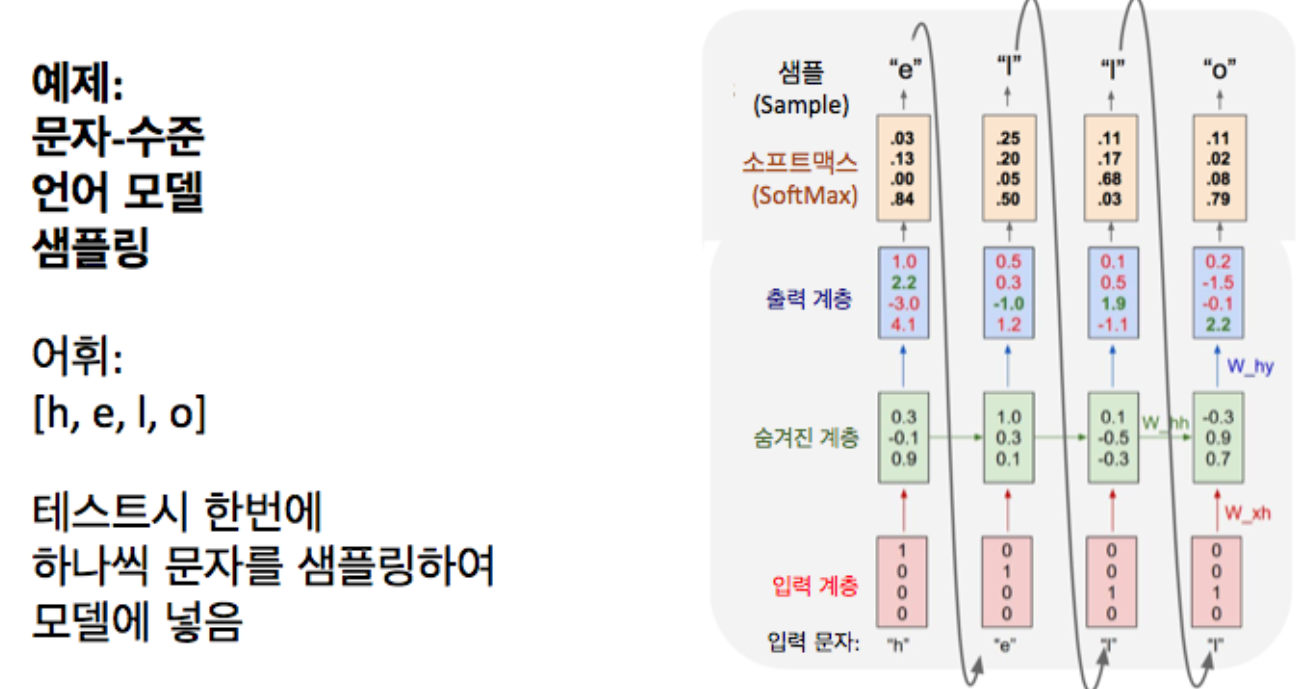

테스트 시에는 훈련된 모델로부터 입력과 정신적으로 유사해보이는 새로운 텍스트를 합성함  


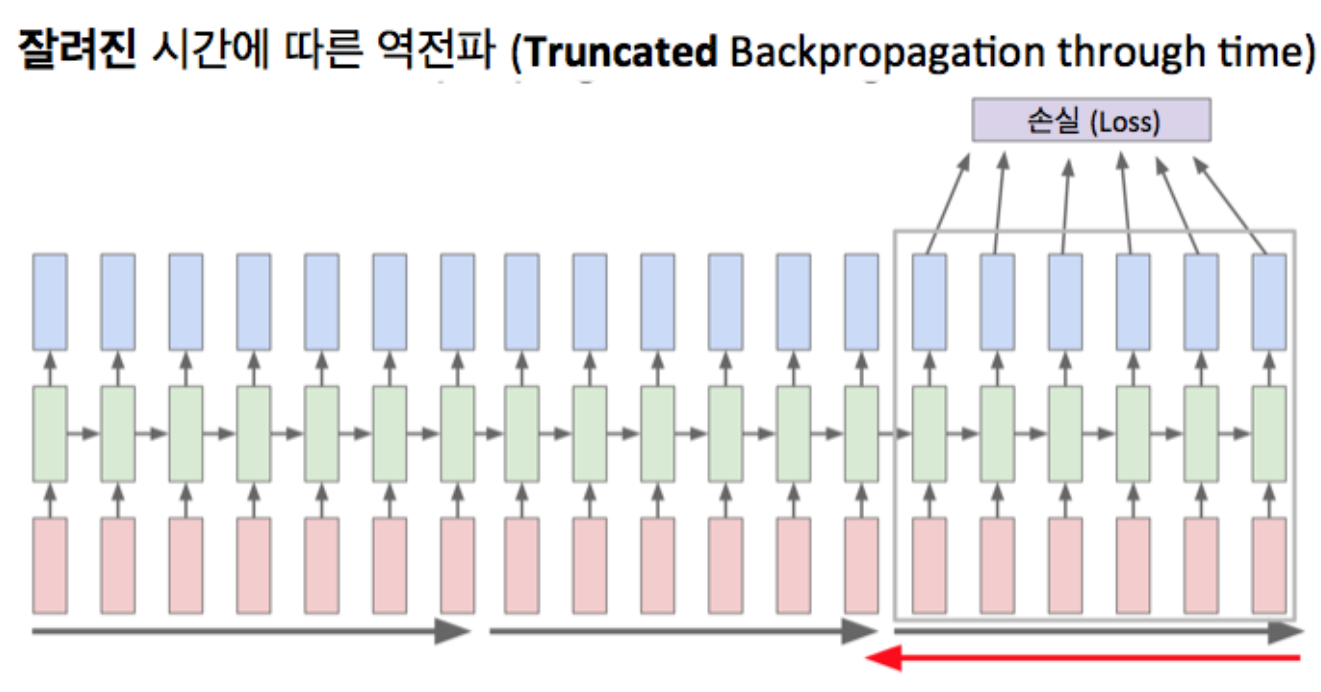

역전파할 때 너무 길면 값만 비싸지니깐 미니배치 같은 아이디어를 씀 신기방기

# 해석가능한 셀 찾기

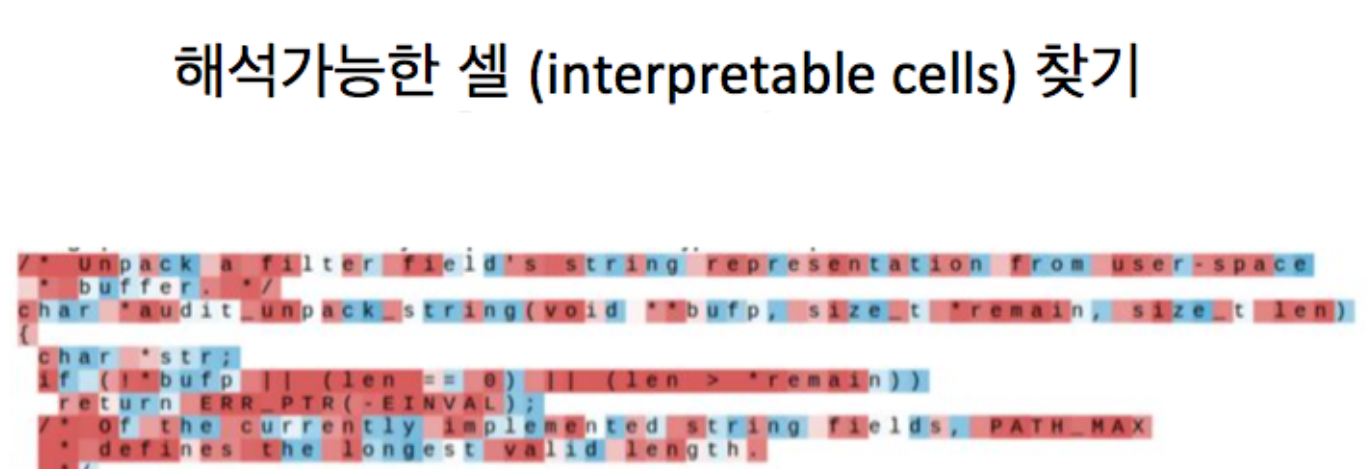

위는 순방향으로 순열을 읽을 때 시점마다 단일 스케일러 요소의 크기에 따라 각 문자에 색이 칠해지도록 한 것이다.  
추적 셀은 인용셀, 줄바꿈 추적 셀, if 문 셀, 주석 셀, 코드 길이 등이 있다.

# 이미지 캡셔닝

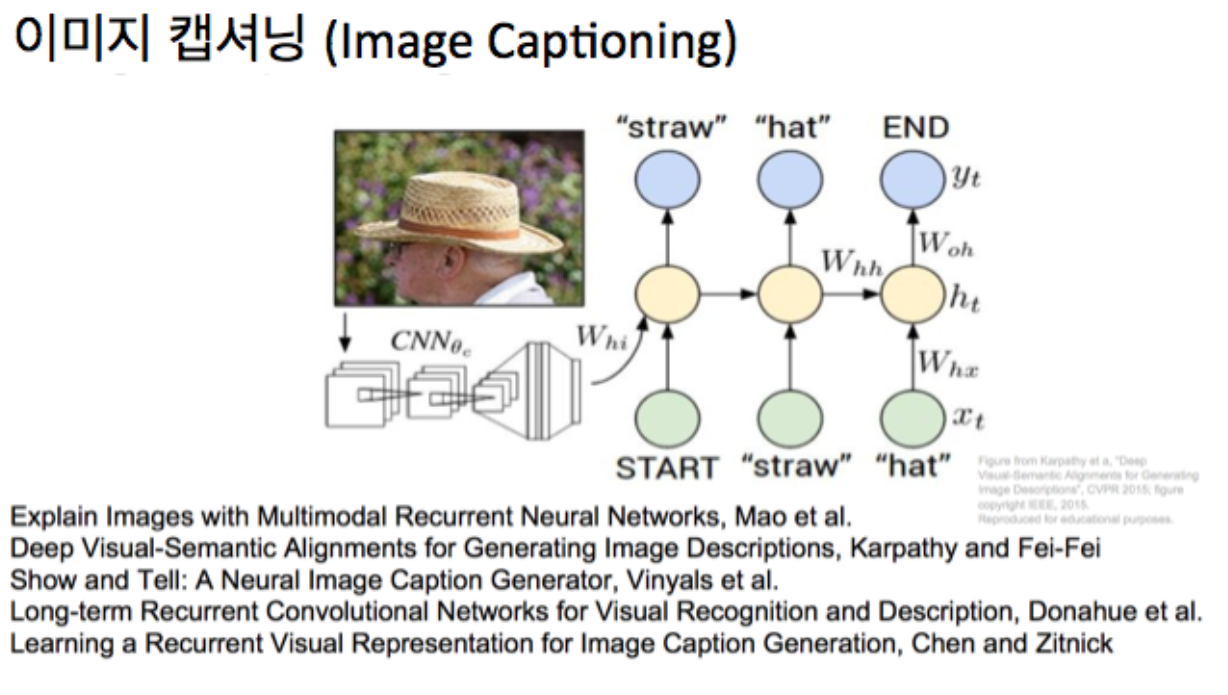

CNN에 이미지 넣고 나온 결과(요약 벡터)를 RNN에 넣어서 캡셔닝  
이때 CNN의 마지막 풀리커넥티드 층과 softmax를 없애서 4096 차원 그대로 전달한다.

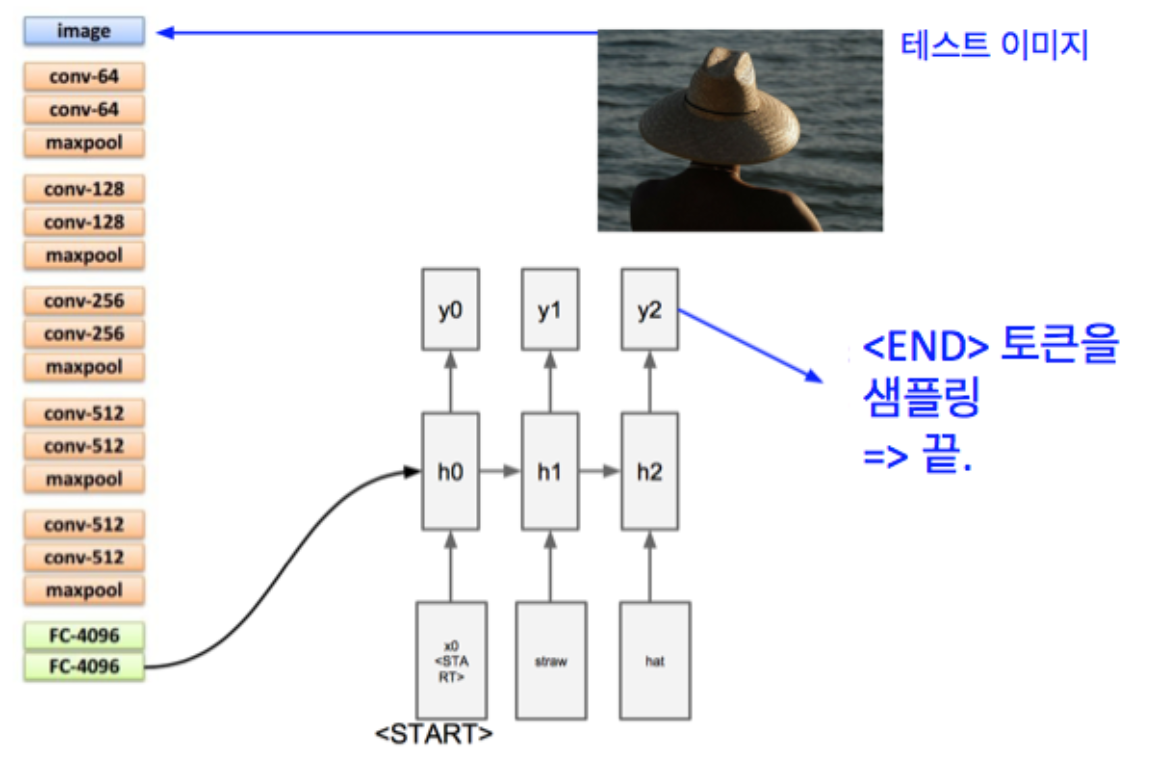

넣어주면 RNN에서 이전과 지금을 고려해서 숨겨진 상태를 계산하고 이를 반복하면 이미지에 대한 설명이 여러 단어들로 만들어짐.

# Attention

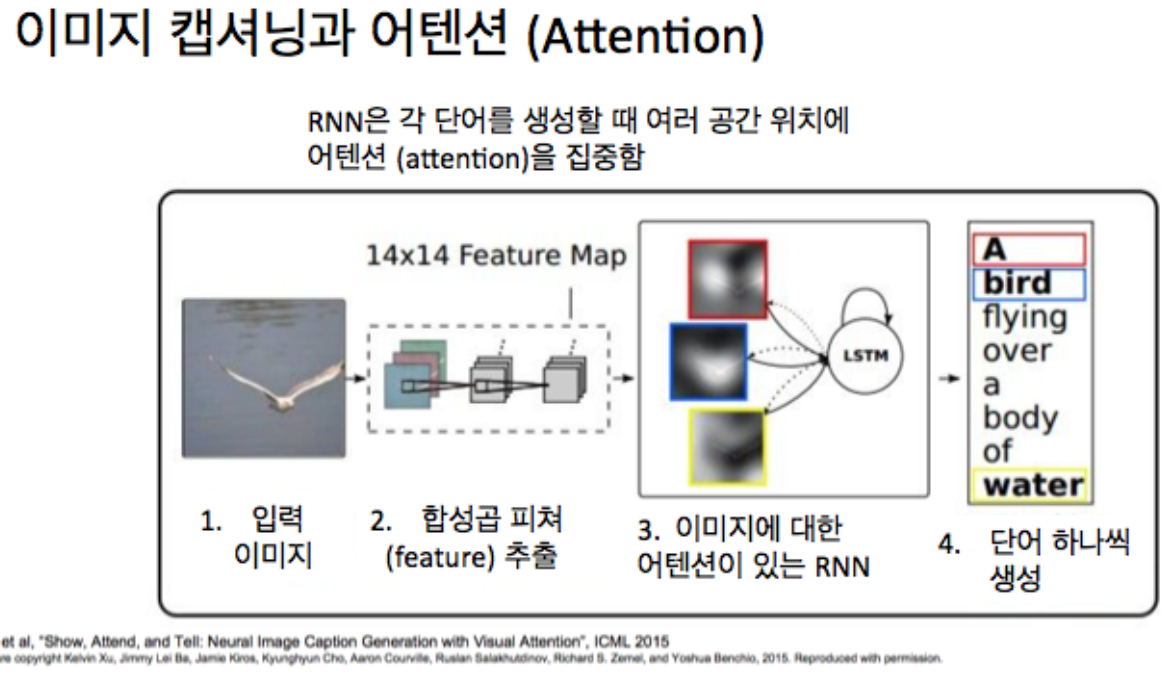

그리드 형식으로 이미지를 분석하고 매 시점마다 어휘를 샘플링하고 모델이 보고 싶은 이미지의 위치에 대한 분포를 만들어 냄.  
여기서 하드 어텐션과 소프트 어텐션이 있는데 소프트 어텐션은 모든 이미지 위치로부터  
모든 피쳐들의 조합을 얻는 것이고  
하드 어텐션의 경우는 하나의 이미지 위치를 고르는 경우이다.(미분 불가능)

00.00

요약  
one to one input과 output 자체가 fixed된 사이즈의 각각에 대해서 sequence하게 간주를 하고 sequential한 처리가 가능함
one to many -> image captioning
many to one -> sentiment classification -> 감정 분류(sequence of words가 인풋)
many to many -> Machine Translation
many to many2 -> Video classification on frame level 여기서 주의할 점은 한 시점에만 적용되면 안됨 현재의 frame + 지나간 것들에 대한 함수로 이루어져야함

DRAW: output을 시퀀셜하게 처리한 것. 출력하는 것임. 오른쪽부터 왼쪽으로 써나가는 예시 보여줌

RNN도 weight로 구성이 되며 새로운 input이 들어올 때마다 다른 반응(계속 업데이트 되기 때문)
매 타임스탭마다 recurrence function을 적용함으로써 sequential처리를 해줄 수 있음

h_t = f_w(h_(t-1), x_t)
new state = some function(old state, input vector)
-> 여기서 주의할 것: 동일한 함수와 동일한 파라미터를 사용해야함 매 타임스탭마다
-> h_t = tanh(W_hh*h_(t-1) + W_xh*x_t)
hello
Vocabulary: helo
매 순간 다음 스텝에 어떤 캐랙터가 와야 하는가 물어봄

main loop -> input에서 p=0으로 설정하고 inputs에 25개의 인티저 값 넣고 target에서는 p에 1을 더해주고 한 개의 offset을 넣어줌 -> 이건 예측 값을 공간

sample함수를 호출함으로써 학습의 매타임스텝마다 예측하는 것을 output으로 

parameter 업데이트(adagrad update)

loss function forward pass, backward pass

image captioning -> CNN에서는 이미지, RNN에서는 Sequence
softmax와 마지막 풀리커넥티드 층을 없애고 RNN으로 보냄
-> 원래에서 top of the convnet 값 추가

RNN에서는 backpropagation할 때 gradient 손실이 생김 (explode or vanishing)
그래서 LSTM이 좋은 것.
근데 RNN에서 cliping을 해주면 조금 나아짐 하지만 그래도 LSTM 쓰는 게 나음

forget gate에서 0이 되지 않게 작은 bias를 넣기도 함

GRU LSTM보다 간단한데 비슷한 성능

additive interaction 상가 작용